# Нейрокомпьютеры.
Контрольная работа.
## Самойлов Александр СКБ222 

**"Построение эквалайзера канала связи"**

# Задание 1  (1 балл)
* Скачайте звук на диск.
* Загрузите звук средствами библиотеки librosa (или soundfile). Длительность - 60 сек. Частота дискретицации - 4000.
* Воспроизведите звук.

In [715]:
%%capture
pip install padasip

In [717]:
URL='https://github.com/neuralcomputer/ML_School/raw/main/u-nu-malysh-davaj.mp3'
!wget -O clear_sound.mp3 https://github.com/neuralcomputer/ML_School/raw/main/u-nu-malysh-davaj.mp3

zsh:1: command not found: wget


In [928]:
# ВАШ КОД ЗДЕСЬ
# Импортируем необходимые библиотеки
from IPython.display import display, Audio
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import librosa

# Загрузим аудио 
audio_path = "clear_sound.mp3"
try:
    audio_data, sample_rate = librosa.load(audio_path, sr=4000, duration=60)
    # Воспроизведем звук
    display(Audio(data=audio_data, rate=sample_rate))
except FileNotFoundError:
    print("Неправильный путь")

# Задание 2 (3 балла)

* Создайте канал в виде КИХ-фильтра с 300 коэффициентами по формуле ниже.
* Постройте импульсную характеристику такого фильтра.
* Пропустите звук через этот канал.
* Результат - искаженный сигнал -  запишите как звук в файл и воспроизведите.
* Постройте график (звуковую волну) чистого звука. Под ним постройте график (звуковую волну) искаженного звука.

In [931]:
n_real=300
distortion_coefficients=np.cos(0.5*np.linspace(0,7,n_real))*np.cos(18*np.linspace(0,15,n_real))

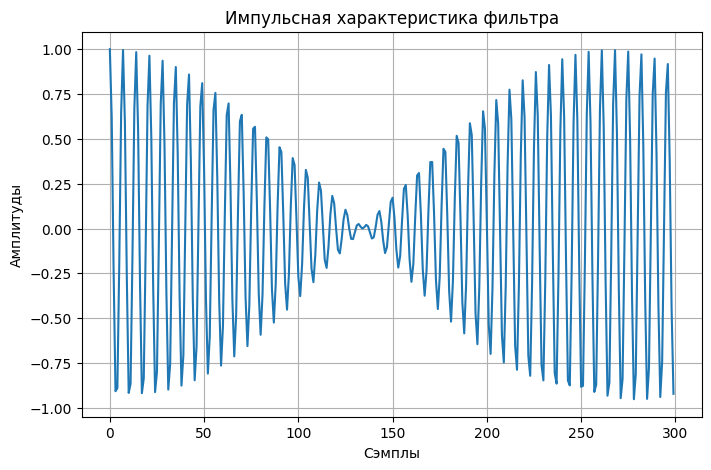

In [933]:
# Построение импульсной характеристики фильтра
plt.figure(figsize=(8, 5))
plt.plot(distortion_coefficients)
plt.title("Импульсная характеристика фильтра")
plt.xlabel("Сэмплы")
plt.ylabel("Амплитуды")
plt.grid(True)
plt.show()

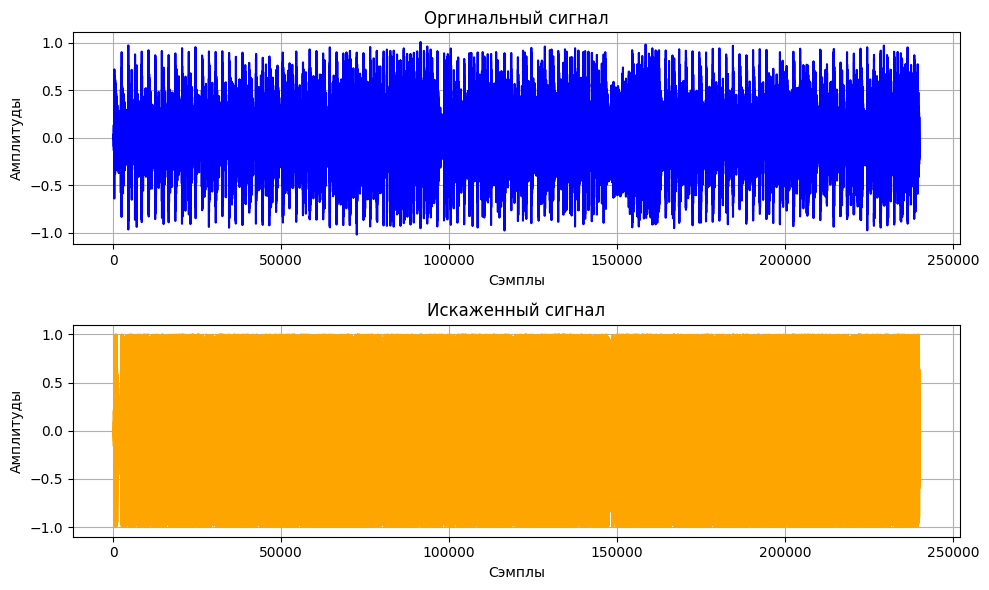

In [1062]:
# Пропустим звуковой сигнал через фильтр
from scipy.signal import lfilter
from scipy.io.wavfile import write

# lfilter(b, a, x) - здесь b = distortion_coefficients, a = [1.0] (т.к. КИХ-фильтр)
filtered_signal = lfilter(distortion_coefficients, 1.0, audio_data)

# Сохраним сигнал
write("filtred_sound.wav", sample_rate, (filtered_signal * 32767).astype(np.int16))
# Нужно нормально записать wav файл, который использует int16 для хранения амплитуд
# для этого нужно перевести в подходящий диапазон [-32767, 32767]

# Скачаем из файла, чтобы получить наш зашумленный сигнал, это нужно,
# чтобы диапазон оригинала и шума был [-1, 1]
filtered_audio_data, sample_rate = librosa.load("filtred_sound.wav", sr=4000)


# Построение графиков оригинального и искаженного звуков
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data, label="Оргинальный сигнал", color="blue")
plt.title("Оргинальный сигнал")
plt.xlabel("Сэмплы")
plt.ylabel("Амплитуды")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(filtered_audio_data, label="Искаженный сигнал", color="orange")
plt.title("Искаженный сигнал")
plt.xlabel("Сэмплы")
plt.ylabel("Амплитуды")
plt.grid(True)

plt.tight_layout()
plt.show()


In [1064]:
# Воспроизведем сигнал
display(Audio(filename="filtred_sound.wav", autoplay=False))

# Задание 3 (4 балла)
* Загрузите искаженный звук из ранее записанного файла с такими же ограничениями по длительности, что и для чистого звука.
* Создайте **эквалайзер** в виде LMS-фильтр (вариант выберите сами), который мог бы восстановить очищенный сигнал из искаженного. Считаем, что эквалайзер работает без задержек.
* Обучите такой эквалайзер:
  * Для начала обучения разрешается пропустить несколько, не больше 1000, первых отсчетов сигнала.
  * Выберите глубину фильтра и прочие гиперпараметры, чтобы выполнялись условия на ошибку (см. ниже).


In [1066]:
# Код взят из ноутбука про Адаптивные фильтры
import padasip as pa # импортируем фильтры

mu = 0.01 # по сути learning_rate
n = 64 # размер фильтра

#Каждый элемент в примерах входа 
#должен быть вектором предыдущих значений шумного сигнала
x = pa.input_from_history(filtered_audio_data, n) # Обрезаем по окошкам

# Cмещаем так же наши звуки
new_audio_data = audio_data[n-1:]

# Инициализация фильтра с параметрами, начальные веса 0
lms_filter = pa.filters.FilterNLMS(n=n, mu=mu, w="random") # создаем фильтр
# Запуск фильра
# Сигнал ошибки e в нашей схеме и есть очищенный сигнал.
restored_signal, error, w = lms_filter.run(new_audio_data, x)

# Задание 4 (1 балл)
* Нарисуйте график ошибки эквалайзера.
* Нарисуйте в виде звуковой волны график восстановленного сигнала (пропущенные значения заполните нулями).
* Сохраните этот сигнал как звук и воспроизведите его.
* Постройте график изменения во времени первых 20 коэффициентов эквалайзера.


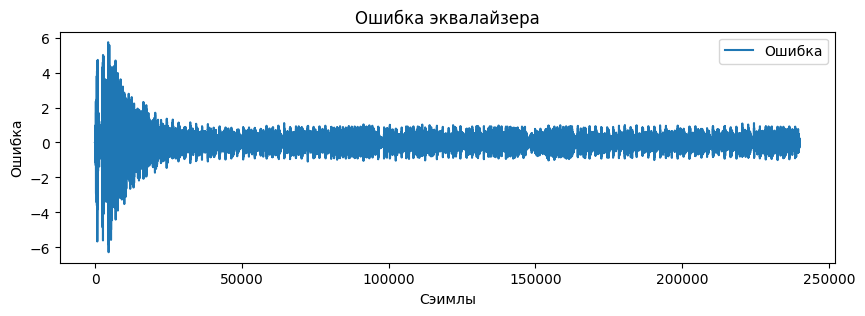

In [1068]:
# Построение графиков
plt.figure(figsize=(10, 3))

# График ошибки эквалайзера
plt.plot(error, label="Ошибка")
plt.title("Ошибка эквалайзера")
plt.xlabel("Сэимлы")
plt.ylabel("Ошибка")
plt.legend()


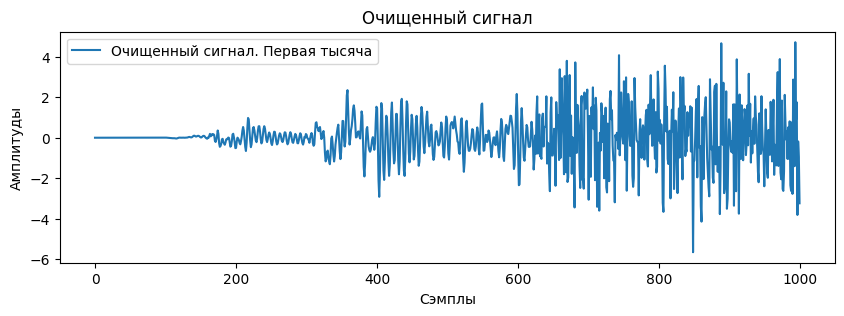

In [1070]:
# Добавляем нули в начале
restored_sound = np.pad(error, (n-1, 0), mode='constant')

# График восстановленного сигнала 
plt.figure(figsize=(10, 3))
plt.plot(restored_sound[:1000], label="Очищенный сигнал. Первая тысяча") # просто чтобы показать что 0 добавили
plt.title("Очищенный сигнал")
plt.xlabel("Сэмплы")
plt.ylabel("Амплитуды")
plt.legend()

# Сохраним сигнал
write("restored_sound.wav", sample_rate, (restored_sound * 32767).astype(np.int16))
# Загрузим из сохраненки
restored_signal, sample_rate = librosa.load("filtred_sound.wav", sr=4000)
# Воспроизведем
display(Audio(filename="restored_sound.wav", autoplay=False))

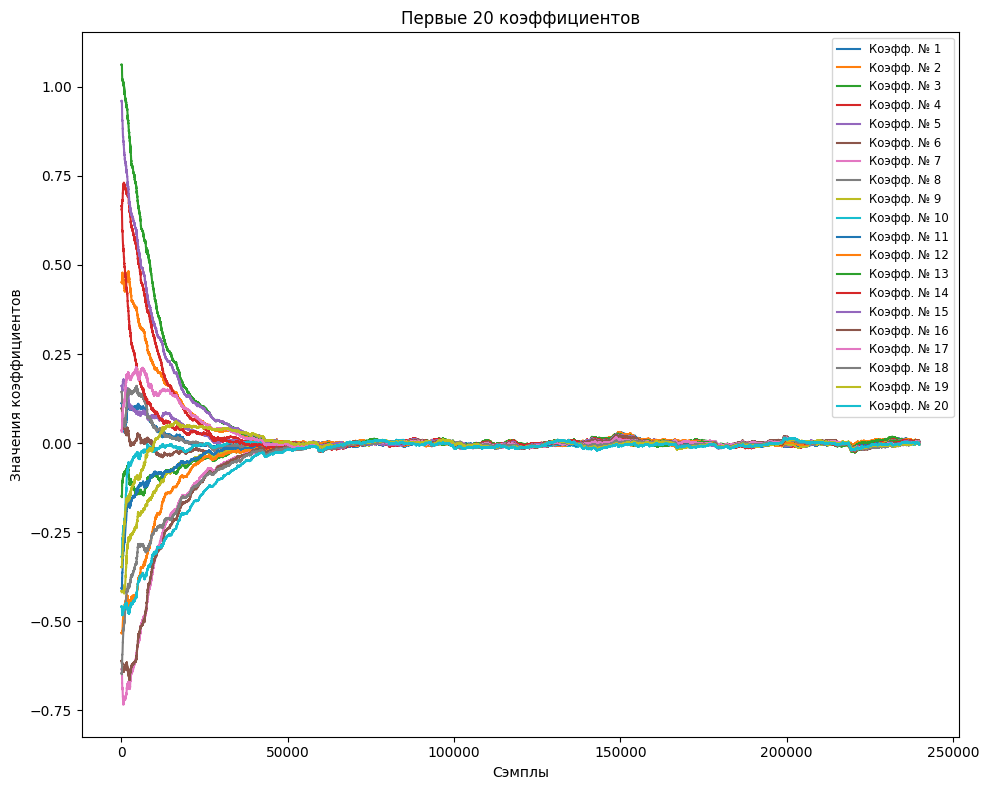

In [1072]:
# График первых 20 коэффициентов весов
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.plot(w[:, i], label=f"Коэфф. № {i+1}")
plt.title("Первые 20 коэффициентов")
plt.xlabel("Сэмплы")
plt.ylabel("Значения коэффициентов")
plt.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

# Задание 5 (1 балл)
Поскольку LMS-фильтр учится в процессе работы, для расчета ошибок будем использовать половины сигналов. Пользуйтесь функцией mean_squared_error из sklearn.
* Посчитайте ошибки mse между чистым и искаженным сигналом, для первой и второй половины сигналов независимо, выведите на экран.
* Посчитайте ошибки mse между чистым и восстановленным сигналом, для первой и второй половины сигналов независимо, выведите на экран.
* Посчитайте и напечатайте во сколько раз улучшилась ошибка для восстановленного сигнала для второй половины по сравнению с первой половиной сигнала. Округлите вывод до одного знака после запятой.  

**Ошибка восстановленного сигнала должна быть меньше искаженного (для обеих половин).**

**Ошибка на второй половине восстановленного сигнала должна быть минимум <u>в 4 раза меньше</u>, чем на первой половине.**

In [1074]:
from sklearn.metrics import mean_squared_error

# Разделение сигналов на две половины
mid_point = len(audio_data) // 2
clean_first_half, clean_second_half = audio_data[:mid_point], audio_data[mid_point:]
distorted_first_half, distorted_second_half = filtered_audio_data[:mid_point], filtered_audio_data[mid_point:]
restored_first_half, restored_second_half = restored_sound[:mid_point], restored_sound[mid_point:]

# Вычисление MSE для первой и второй половин
mse_distorted_first = mean_squared_error(clean_first_half, distorted_first_half)
mse_distorted_second = mean_squared_error(clean_second_half, distorted_second_half)

mse_restored_first = mean_squared_error(clean_first_half, restored_first_half)
mse_restored_second = mean_squared_error(clean_second_half, restored_second_half)

# Вычисление улучшения ошибки для второй половины
improvement_ratio = mse_restored_first / mse_restored_second

# Вывод результатов
print(f"Восстановленный 1 половина: {mse_restored_first}")
print(f"Искаженный 1 половина: {mse_distorted_first}")
print(f"Восстановленный 2 половина: {mse_restored_second}")
print(f"Искаженный 2 половина: {mse_distorted_second}")
print(f"Улучшилось в {round(improvement_ratio, 1)} раз")

assert mse_restored_first < mse_distorted_first, "Ошибка восстановленного сигнала (первая половина) больше искаженного!"
assert mse_restored_second < mse_distorted_second, "Ошибка восстановленного сигнала (вторая половина) больше искаженного!"

# Проверка: ошибка восстановленного сигнала на второй половине минимум в 4 раза меньше, чем на первой половине
assert mse_restored_first / mse_restored_second >= 4, (
    f"Ошибка на второй половине восстановленного сигнала должна быть минимум в 4 раза меньше, "
    f"но она меньше (коэффициент: {mse_restored_first / mse_restored_second:.2f})."
)

print("Все проверки пройдены успешно!")


Восстановленный 1 половина: 0.13077462363878525
Искаженный 1 половина: 0.34090909361839294
Восстановленный 2 половина: 0.002279739110867407
Искаженный 2 половина: 0.3578312397003174
Улучшилось в 57.4 раз
Все проверки пройдены успешно!


# Отправка решения
Баллы за последующие задания выставляются только при правильном выполнении предыдущих.

Внимательно проверьте ваше решение. Отправьте решение на проверку, приложив  ваш colab-файл. Код обязан работать в Колаб. Все выходы, картинки, звуки, должны быть сохранены в файле.

Разрешается использование материалов семинаров. Запрещается списывание. Приветствуются комментарии к выполняемым действиям. В вашем решении не должно быть постороннего кода, ненужного для выполнения заданий.
